Data Description

The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts of two-channel ambulatory ECG recordings, obtained from 47 subjects studied by the BIH Arrhythmia Laboratory. The data can be obtained for all the records from the Physionet Database.

https://archive.physionet.org/physiobank/database/mitdb/

Other Resources used:

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0244-x#Tab9

http://ecg.mit.edu/george/publications/mitdb-embs-2001.pdf

In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The data from all the records have been pre-processed and split into two datasets which are MIT-BIH Train dataset and MIT-BIH Test dataset in the form of csv files. We will be importing these 2 datasets and then apply various Machine Learning models to check whihc models gives us  more accurate prediction.

Link to the datasets:

https://drive.google.com/drive/folders/159WV3PR3x5vpWwbbsjCXK5k4tgaNn0Ut

In [32]:
# import machine learning modules and metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold,  StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from warnings import simplefilter
from sklearn.metrics import confusion_matrix

In [3]:
# Importing the Train dataset from csv file

mitbih_train_data = pd.read_csv('/content/sample_data/mitbih_train.csv',sep = ',',header=0)
mitbih_train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.103,0.118,0.125,0.142,0.127,0.152,0.145,0.1640,0.1450,0.1590,0.1520,0.154,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.148,0.182,0.194,0.214,0.208,0.222,0.254,0.2710,0.2880,0.2850,0.2930,0.256,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.238,0.270,0.286,0.316,0.319,0.332,0.297,0.2680,0.2160,0.1890,0.1320,0.119,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.119,0.138,0.141,0.138,0.146,0.110,0.102,0.0608,0.0276,0.0387,0.0138,0.011,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.216,0.216,0.202,0.211,0.230,0.216,0.230,0.2390,0.2680,0.2540,0.2300,0.221,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mitbih_train_data.shape

(87554, 188)

In [4]:
# Importing the test dataset from the csv file

mitbih_test_data = pd.read_csv('/content/sample_data/mitbih_test.csv',sep = ',',header=0)
mitbih_test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
0,1.000,0.758,0.112,0.000,0.0806,0.07850,0.0661,0.04960,0.0475,0.0351,0.0310,0.0289,0.0351,0.0269,0.0393,0.0351,0.0434,0.0475,0.0537,0.0537,0.0702,0.0723,0.0847,0.0971,0.122,0.132,0.169,0.196,0.215,0.2360,0.2540,0.2640,0.2850,0.2730,0.2670,0.2400,0.2150,0.1740,0.1570,0.1240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908,0.784,0.531,0.363,0.3660,0.34400,0.3330,0.30800,0.2970,0.3000,0.3040,0.3370,0.3770,0.3920,0.4400,0.4470,0.4580,0.4800,0.5130,0.5350,0.5860,0.5860,0.6040,0.6340,0.615,0.582,0.564,0.520,0.491,0.4910,0.4690,0.4540,0.4510,0.4650,0.4510,0.4320,0.4250,0.4100,0.3920,0.3700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730,0.212,0.000,0.119,0.1020,0.10200,0.1110,0.12400,0.1150,0.1330,0.1060,0.1420,0.1280,0.1500,0.1330,0.1500,0.1330,0.1500,0.1240,0.1640,0.1370,0.1420,0.1330,0.1500,0.128,0.146,0.119,0.124,0.102,0.0929,0.0708,0.0796,0.0664,0.0708,0.0796,0.0929,0.0885,0.0841,0.0796,0.0885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000,0.910,0.681,0.473,0.2290,0.06880,0.0000,0.00417,0.0146,0.0542,0.1020,0.1230,0.1500,0.1690,0.1730,0.1710,0.1690,0.1650,0.1560,0.1520,0.1480,0.1480,0.1460,0.1460,0.142,0.142,0.148,0.158,0.169,0.1790,0.1920,0.2060,0.2210,0.2400,0.2580,0.2750,0.2870,0.3080,0.3210,0.3310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570,0.399,0.238,0.148,0.0000,0.00336,0.0403,0.08050,0.0705,0.0906,0.0805,0.1040,0.0940,0.1170,0.0973,0.1340,0.1240,0.1610,0.1710,0.1950,0.2050,0.2620,0.2750,0.3320,0.346,0.396,0.406,0.456,0.446,0.4460,0.3990,0.3690,0.3090,0.2950,0.2650,0.2720,0.2580,0.2680,0.2620,0.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mitbih_test_data.shape

(21892, 188)

In [8]:
# Checking the data count for each type of target variable in  both Train and test dataset
mitbih_test_data["Target"].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Target, dtype: int64

In [9]:
mitbih_train_data["Target"].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Target, dtype: int64

The last column which is the Target column has 5 values ranging from 0 to 4 which correspond to the different types of the Heart beat. In order to include a label to each Heart beat type, we will include another column names 'Label' in both datasets

In [10]:
mitbih_train_data['Label']=" "

In [11]:
mitbih_train_data.dtypes

X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
           ...   
X185      float64
X186      float64
X187      float64
Target    float64
Label      object
Length: 189, dtype: object

In [13]:
mitbih_test_data['Label']=" "

5 types of the Heart Beat Classification

**N - Normal Beat (0)**

**S - Supraventricular Ectopic Beat (1)**

**V - Ventricular Ectopic Beat (2)**

**F - Fusion Beat (3)**

**Q - Unknown Beat (4)**



Ectopic heartbeats are extra heartbeats that occur just before a regular beat. Ectopic beats are normal and usually not a cause for concern, though they can make people feel anxious. People may feel like their heart is skipping a beat or is producing an extra beat.

A fusion beat occurs when a supraventricular and a ventricular impulse coincide to produce a hybrid complex.

The following plots have been created using the data from the csv data for random samples,  to clearly understand the pattern of the heart beat for each type of the beat.

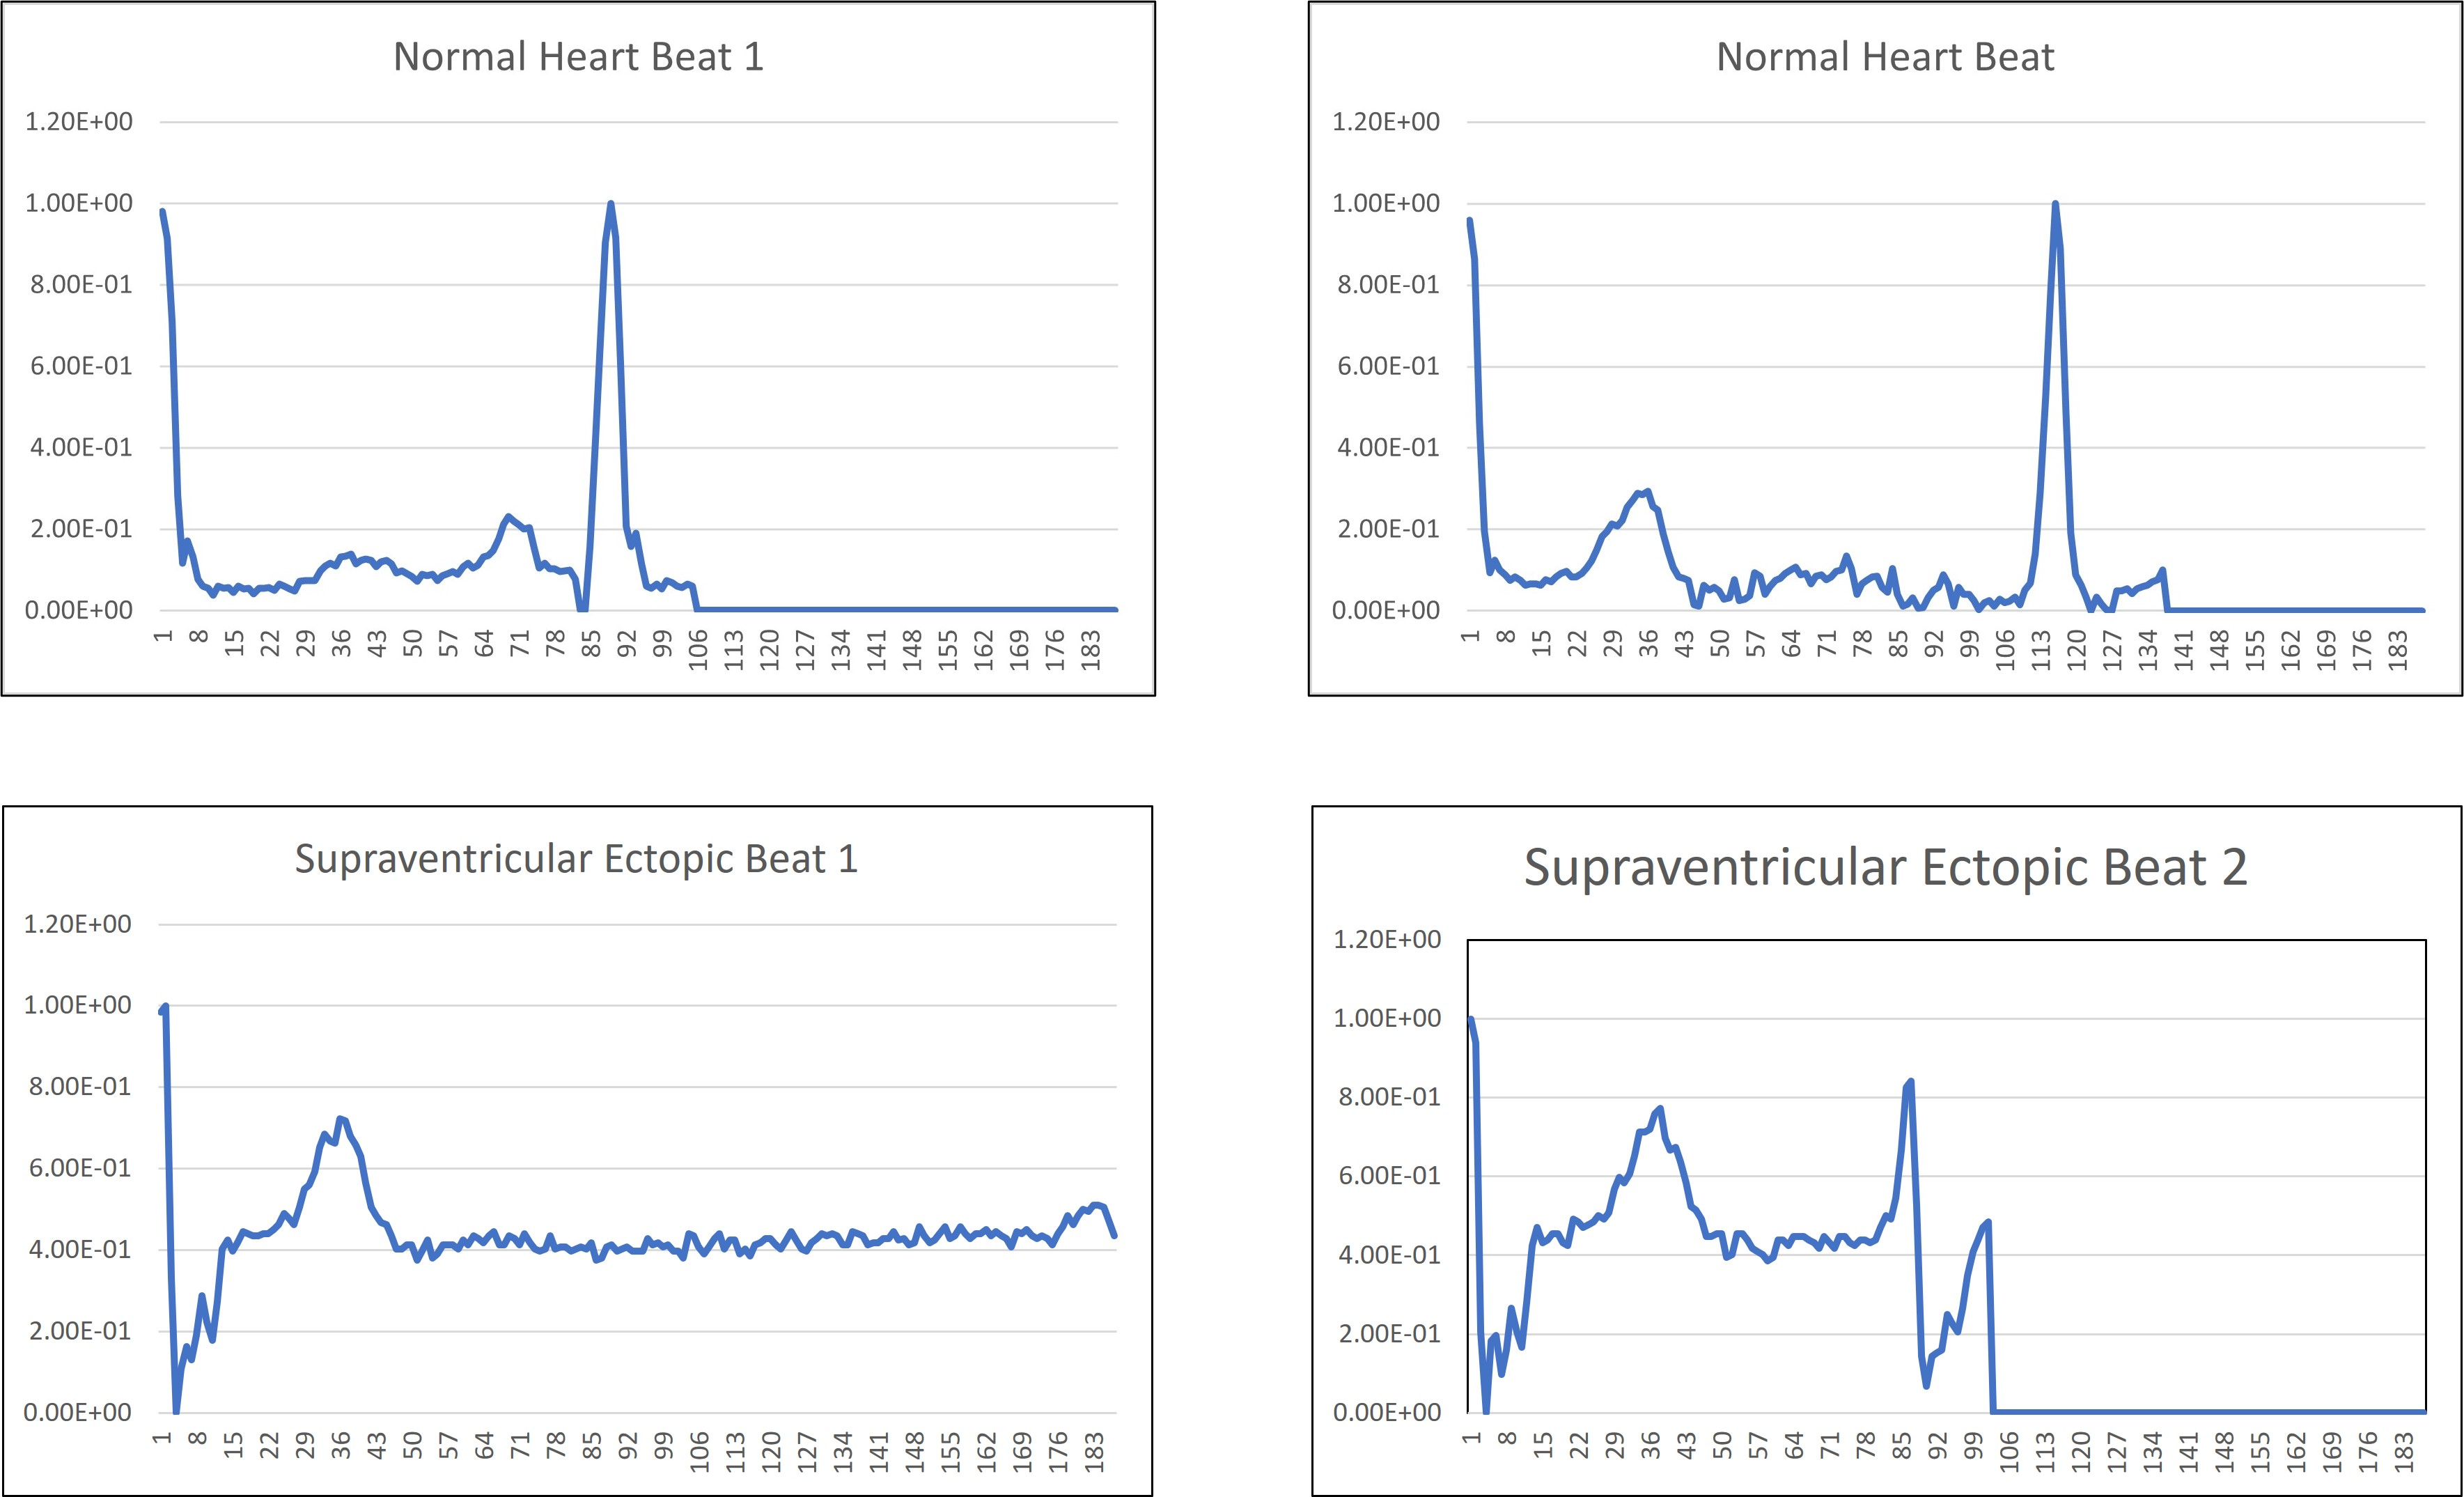

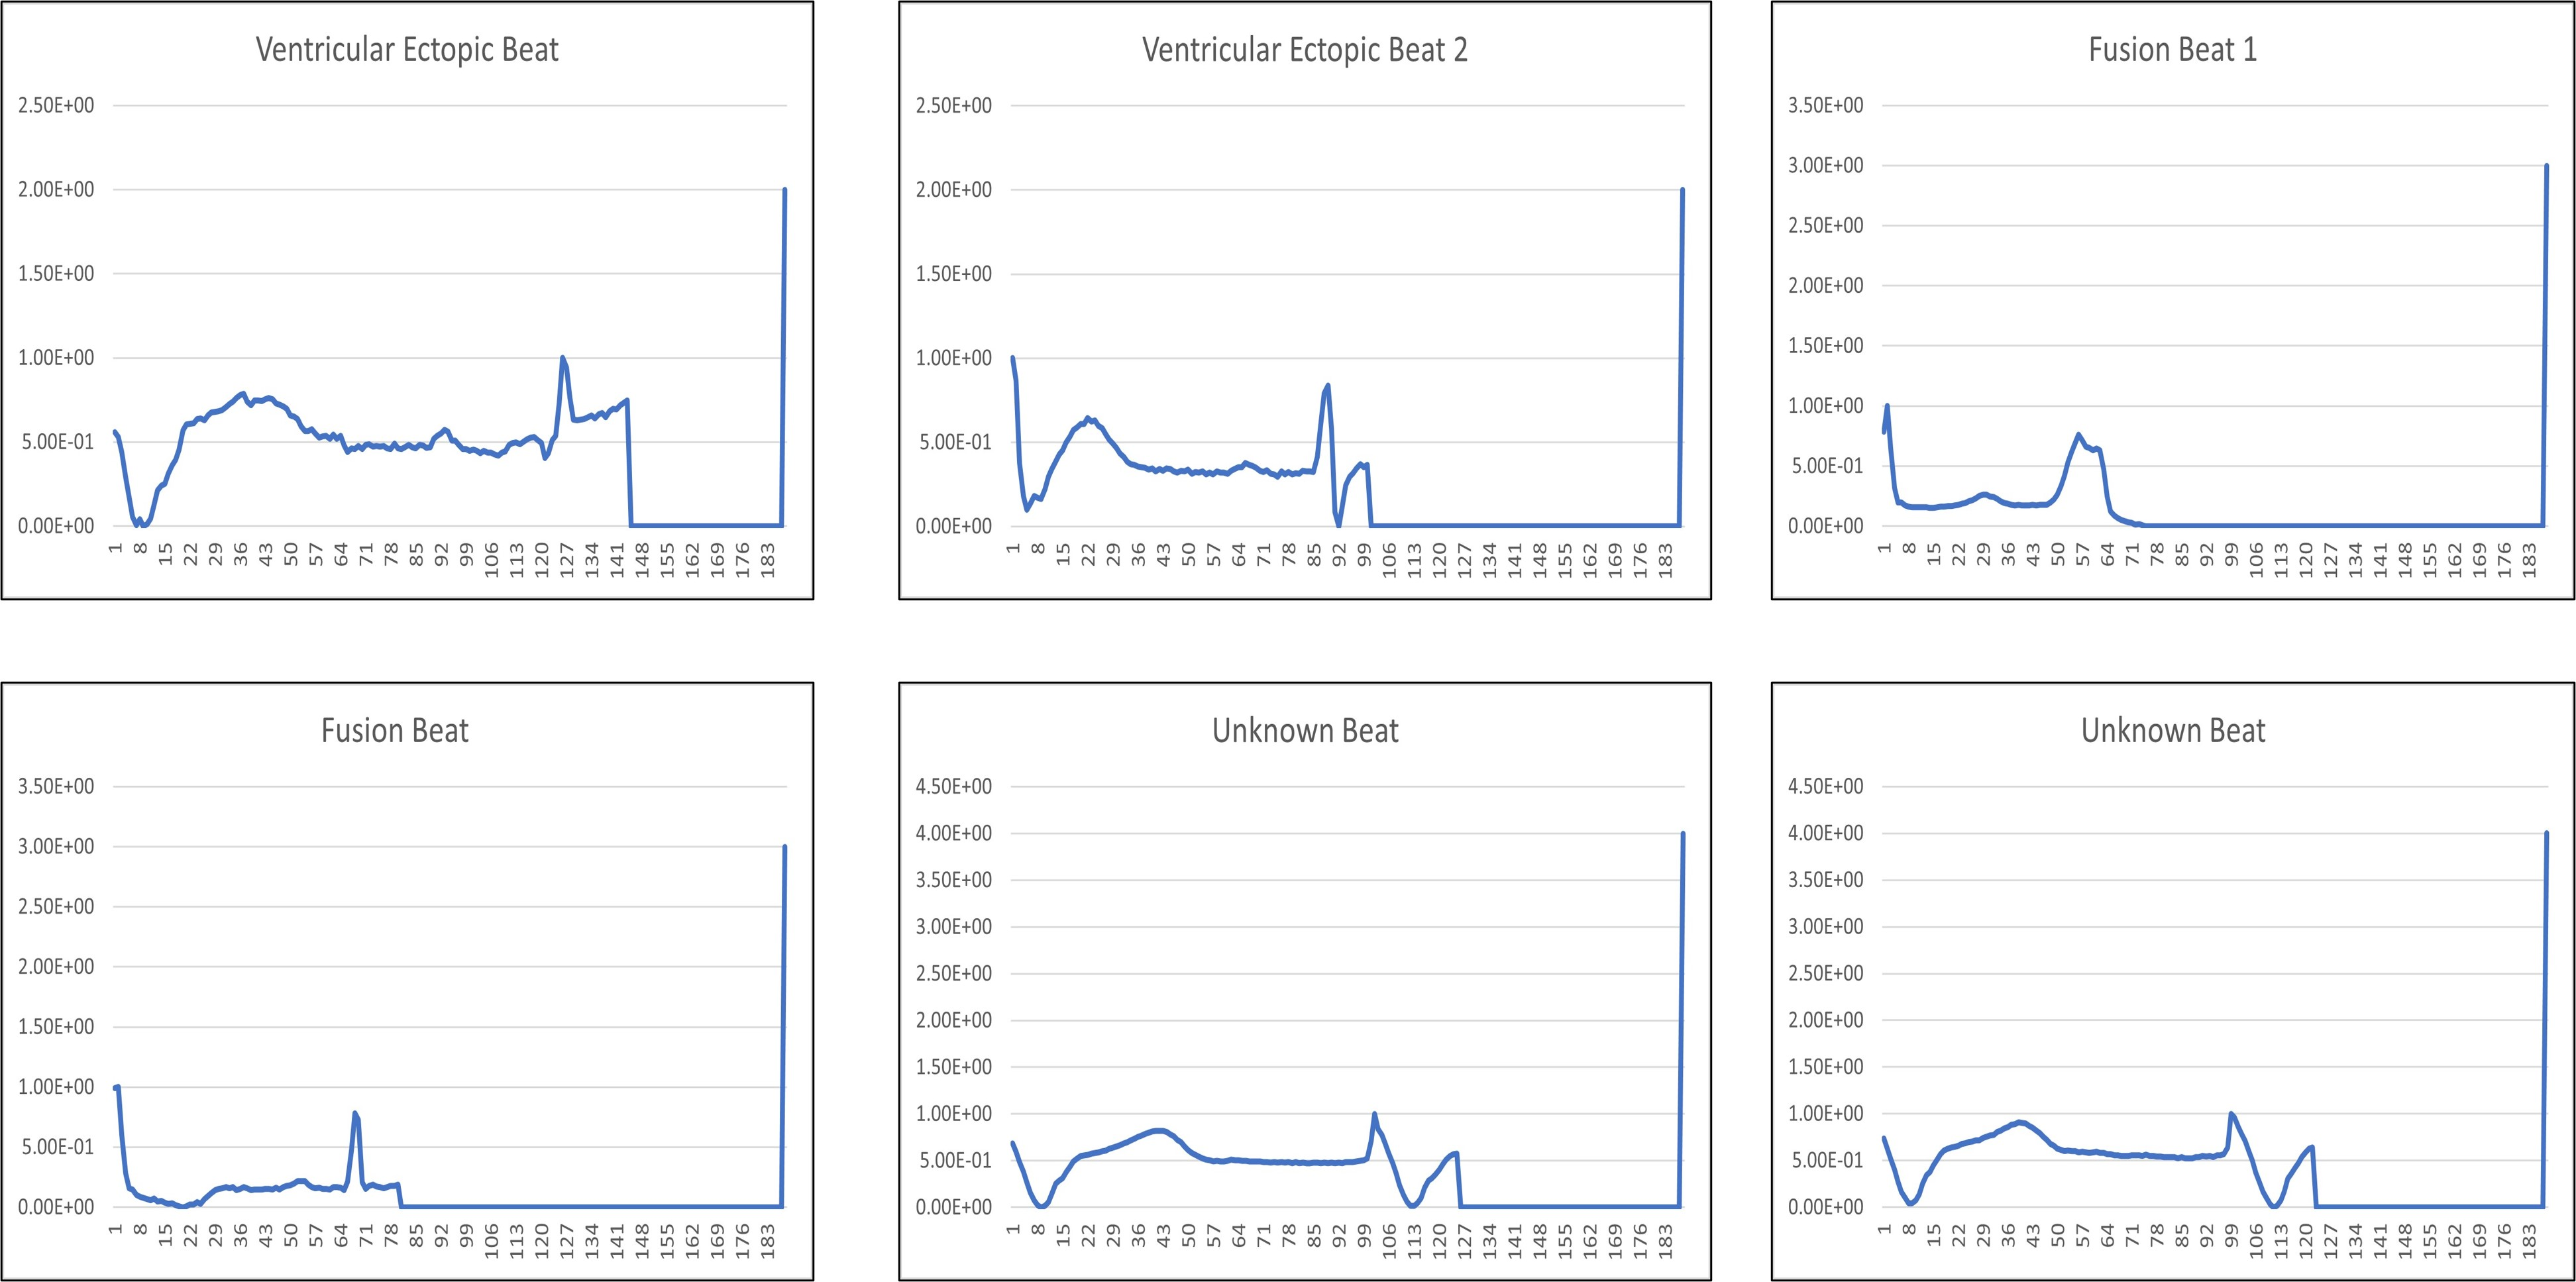

In [14]:
#The last column which is our Target specifies the type of the beat based on each patients 
mitbih_train_data.loc[mitbih_train_data['Target'] == 0 , 'Label'] = 'N'
mitbih_train_data.loc[mitbih_train_data['Target'] == 1 , 'Label'] = 'S'
mitbih_train_data.loc[mitbih_train_data['Target'] == 2 , 'Label'] = 'V'
mitbih_train_data.loc[mitbih_train_data['Target'] == 3 , 'Label'] = 'F'
mitbih_train_data.loc[mitbih_train_data['Target'] == 4 , 'Label'] = 'Q'

In [15]:
mitbih_test_data.loc[mitbih_test_data['Target'] == 0 , 'Label'] = 'N'
mitbih_test_data.loc[mitbih_test_data['Target'] == 1 , 'Label'] = 'S'
mitbih_test_data.loc[mitbih_test_data['Target'] == 2 , 'Label'] = 'V'
mitbih_test_data.loc[mitbih_test_data['Target'] == 3 , 'Label'] = 'F'
mitbih_test_data.loc[mitbih_test_data['Target'] == 4 , 'Label'] = 'Q'

In [16]:
mitbih_train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target,Label
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.08580,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.10300,0.11800,0.12500,0.142,0.1270,0.1520,0.1450,0.1640,0.1450,0.1590,0.1520,0.1540,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.08830,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.14800,0.18200,0.19400,0.214,0.2080,0.2220,0.2540,0.2710,0.2880,0.2850,0.2930,0.2560,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.04320,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.23800,0.27000,0.28600,0.316,0.3190,0.3320,0.2970,0.2680,0.2160,0.1890,0.1320,0.1190,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.06080,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.11900,0.13800,0.14100,0.138,0.1460,0.1100,0.1020,0.0608,0.0276,0.0387,0.0138,0.0110,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.08920,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.21600,0.21600,0.20200,0.211,0.2300,0.2160,0.2300,0.2390,0.2680,0.2540,0.2300,0.2210,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807,0.495,0.537,0.5300,0.4910,0.4840,0.4560,0.39600,0.2840,0.1370,0.0526,0.1400,0.1190,0.0912,0.1400,0.1610,0.1050,0.1440,0.1440,0.1300,0.1470,0.1580,0.1650,0.1680,0.1540,0.17500,0.16500,0.15400,0.182,0.1930,0.1960,0.2070,0.2180,0.2180,0.2560,0.2840,0.2950,0.3020,0.3020,0.32300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87550,0.718,0.605,0.487,0.3620,0.2320,0.1200,0.0517,0.00167,0.0000,0.0133,0.0783,0.1830,0.2750,0.3150,0.3620,0.4300,0.4820,0.5270,0.5430,0.5630,0.5820,0.5880,0.6000,0.6030,0.6130,0.62200,0.63700,0.65200,0.665,0.6820,0.7000,0.7120,0.7350,0.7630,0.7850,0.8100,0.8350,0.8570,0.8770,0.88000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87551,0.906,0.624,0.596,0.5760,0.5310,0.4820,0.4450,0.38800,0.3220,0.1920,0.0980,0.0490,0.0367,0.0531,0.0531,0.0980,0.1840,0.2690,0.3510,0.4080,0.4370,0.4690,0.4820,0.5180,0.5310,0.53500,0.5

In [17]:
# Getting statistics of the train data
mitbih_train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758161,0.423971,0.219103,0.201127,0.210399,0.205807,0.201771,0.198690,0.196756,0.198779,0.203550,0.208776,0.212884,0.218392,0.224966,0.231376,0.237123,0.242582,0.247924,0.253750,0.259748,0.266245,0.272735,0.279355,0.285587,0.291809,0.297672,0.303383,0.308795,0.313891,0.318453,0.322087,0.324891,0.326738,0.327817,0.327931,0.326746,0.324326,0.320537,...,0.030730,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023933,0.023060,0.022459,0.021809,0.021245,0.020624,0.020027,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014401,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005982,0.005478,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002944,0.002807,0.473376
std,0.240908,0.221812,0.227306,0.206879,0.177057,0.171909,0.178481,0.177241,0.171777,0.168357,0.171797,0.176496,0.180274,0.184102,0.186962,0.190003,0.193899,0.198465,0.202856,0.207166,0.211188,0.214823,0.218451,0.221487,0.224032,0.225848,0.227135,0.227830,0.228436,0.228871,0.228762,0.228394,0.227473,0.226181,0.224661,0.223111,0.221353,0.219259,0.216886,0.214169,...,0.116517,0.114463,0.112687,0.111103,0.110513,0.108567,0.106493,0.104591,0.102658,0.101396,0.100201,0.099386,0.098328,0.096637,0.095729,0.095369,0.095055,0.092902,0.091117,0.088575,0.084637,0.079947,0.075309,0.069893,0.063993,0.060074,0.056405,0.052840,0.050007,0.046692,0.044154,0.042090,0.040524,0.038650,0.037194,0.036256,0.034789,0.032865,0.031923,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922000,0.682250,0.251000,0.048500,0.082300,0.088400,0.073300,0.066100,0.065000,0.068600,0.070525,0.069200,0.068300,0.067725,0.070200,0.073000,0.074800,0.076000,0.076900,0.077900,0.079425,0.081900,0.085900,0.090000,0.094600,0.098900,0.104000,0.109000,0.115000,0.121000,0.128000,0.136000,0.144000,0.152000,0.158000,0.161000,0.161000,0.159000,0.157000,0.155000,...,0.000000,0.000000,0.000000,0.000000,0.0

In [18]:
mitbih_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 189 entries, X1 to Label
dtypes: float64(188), object(1)
memory usage: 126.2+ MB


In [21]:
# Checking for null values in the train data
mitbih_train_data.isna().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X185      0
X186      0
X187      0
Target    0
Label     0
Length: 189, dtype: int64

In [22]:
# Getting statistics of the test data
mitbih_test_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.00000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761905,0.426625,0.221597,0.201677,0.209889,0.204804,0.200989,0.197636,0.196024,0.197905,0.202438,0.207303,0.211522,0.216839,0.223455,0.229844,0.235463,0.240702,0.245977,0.251754,0.257663,0.263790,0.270544,0.276922,0.283181,0.289346,0.295349,0.301179,0.306479,0.311710,0.316233,0.319873,0.322811,0.324713,0.325811,0.325857,0.324729,0.322519,0.319144,...,0.030044,0.028963,0.027823,0.026607,0.025425,0.024428,0.023681,0.022906,0.022260,0.021632,0.020902,0.020205,0.019503,0.019054,0.018643,0.018238,0.017482,0.016572,0.015761,0.01477,0.013538,0.012467,0.011262,0.010014,0.008845,0.007798,0.007057,0.006127,0.005743,0.005194,0.004587,0.004327,0.004019,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234559,0.218659,0.228573,0.208714,0.177728,0.172191,0.177947,0.176141,0.170231,0.166708,0.169880,0.174435,0.178158,0.182113,0.184688,0.187601,0.191432,0.195808,0.200436,0.204642,0.208837,0.212703,0.216299,0.219482,0.222086,0.224110,0.225235,0.226220,0.226848,0.227060,0.226928,0.226797,0.225436,0.223761,0.222199,0.220768,0.218937,0.217264,0.215056,0.212748,...,0.115209,0.113676,0.111877,0.110036,0.107467,0.105065,0.103549,0.102302,0.101058,0.099724,0.098239,0.096409,0.094838,0.093727,0.093930,0.093980,0.091963,0.089596,0.087860,0.08527,0.082143,0.079361,0.075337,0.070436,0.065434,0.060259,0.056702,0.051873,0.049752,0.046439,0.043126,0.042188,0.040250,0.039399,0.038535,0.037717,0.035900,0.035524,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924000,0.683000,0.251000,0.050500,0.082900,0.087900,0.072700,0.066000,0.064500,0.068500,0.070700,0.069100,0.068300,0.067700,0.069700,0.072300,0.074200,0.075200,0.076400,0.076900,0.078200,0.080600,0.083500,0.088000,0.092900,0.097400,0.102000,0.108000,0.113000,0.120000,0.126000,0.134000,0.143000,0.151000,0.157000,0.160000,0.161000,0.158000,0.157000,0.155000,...,0.000000,0.000000,0.000000,0.000000,0.00000

In [23]:
mitbih_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 189 entries, X1 to Label
dtypes: float64(188), object(1)
memory usage: 31.6+ MB


In [24]:
# Checking null values of the test data
mitbih_test_data.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X185      0
X186      0
X187      0
Target    0
Label     0
Length: 189, dtype: int64

In [25]:
# Splitting the train and test data to fit into the Machine learning models
X_train=mitbih_train_data.drop(['Target','Label'], axis=1)
y_train=mitbih_train_data.Label

In [26]:
X_test=mitbih_test_data.drop(['Target','Label'], axis=1)
y_test=mitbih_test_data.Label

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [28]:
print(y_train.value_counts(), y_test.value_counts())

N    72471
Q     6431
V     5788
S     2223
F      641
Name: Label, dtype: int64 N    18118
Q     1608
V     1448
S      556
F      162
Name: Label, dtype: int64


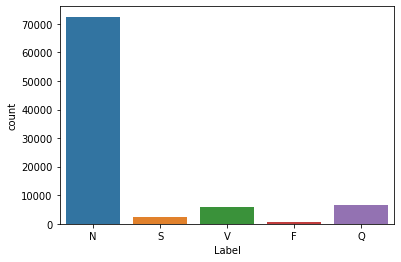

In [29]:
# Checking for the distribution of the data samples for the 5 types of target variables from Train and Test data
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=mitbih_train_data, x='Label')

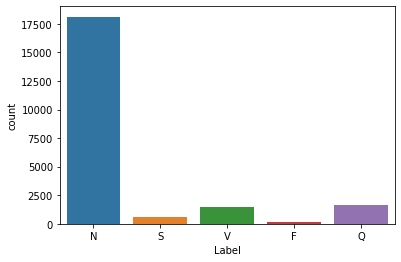

In [30]:
sns.countplot(data=mitbih_test_data, x='Label')

Both Train and test data show that there are large number of samples for the persons having a Normal(N) type of heart beat and very less number of samples for the other 4 types of the heart beats. Hence this dataset seems to be a very imbalanced data.

An imbalanced dataset is defined by great differences in the distribution of the classes in the dataset. This means that a dataset is biased towards a class in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class.

There are some important techniques that will help to deal with the imbalanced data. Some of them are Undersampling, oversampling and ensemble learning techniques. But for this current analysis, we will not be performing any of these and the data will be used as provided for the Machine Learning models.

This dataset is an example of a classification problem.


There are many classifiers to choose from
• SVM

• Naïve Bayes

• Bayesian network

• Logistic regression

• Randomized Forests

• Boosted Decision Trees

• K-nearest neighbor

Will be applying some of these models to see the performance and accuracy of the predictions

**Logistic Regression Model**

In [33]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
lr_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5)
cv_score = cross_val_score(lr_model, X_train, y_train, cv=skf)
print(cv_score)
print(cv_score.mean())

[0.90845754 0.91319742 0.91416824 0.90931415 0.91376356]
0.9117801811839834


In [35]:
# Fitting the train data into the model
lr_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# checking the accuracy score and getting the Confusion Matrix
y_pred_lr= lr_model.predict(X_test)

print("Accuracy Score for Linear Regression Model:", accuracy_score(y_test, y_pred_lr))


Accuracy Score for Linear Regression Model: 0.9114288324502101


In [43]:
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr,labels=('N','S','V','F','Q'))
cnf_matrix_lr

array([[17833,    28,   195,    17,    45],
       [  326,   198,    31,     0,     1],
       [  910,    11,   474,    26,    27],
       [  107,     0,     7,    48,     0],
       [  185,     0,    23,     0,  1400]])

In [ ]:
          N      S       V       F      Q
     N  [17833,    28,   195,    17,    45],
     S  [  326,   198,    31,     0,     1],
     V  [  910,    11,   474,    26,    27],
     F  [  107,     0,     7,    48,     0],
     Q  [  185,     0,    23,     0,  1400]

In [44]:
print(classification_report(y_test, y_pred_lr)) 

              precision    recall  f1-score   support

           F       0.53      0.30      0.38       162
           N       0.92      0.98      0.95     18118
           Q       0.95      0.87      0.91      1608
           S       0.84      0.36      0.50       556
           V       0.65      0.33      0.44      1448

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.63     21892
weighted avg       0.90      0.91      0.90     21892



Text(0.5, 257.44, 'Predicted label')

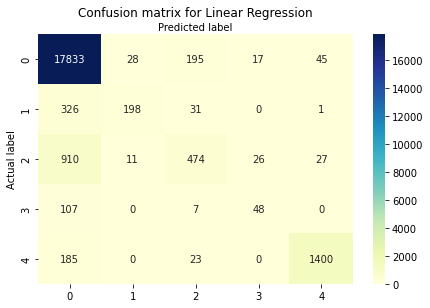

In [45]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Linear Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Accoracy score fo the Linear Regression is 91% which seems to be good. But the confusion matrix indicates that most of the data has been misclassified with the dominating class which is Normal.

**Naive Bayes Classification**

In [48]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
# compute the accuracy
print("Accuracy Score for Naive Bayes model:",accuracy_score(y_test, y_pred_nb))


Accuracy Score for Naive Bayes model: 0.1914854741458067


In [50]:
cnf_matrix_nb=confusion_matrix(y_test, y_pred_nb,labels=('N','S','V','F','Q'))
cnf_matrix_nb

array([[ 2106,    58,  1151,  2167, 12636],
       [   44,    78,    32,    51,   351],
       [  127,     9,   281,    80,   951],
       [    0,     0,     1,   134,    27],
       [    1,     0,     5,     9,  1593]])

Text(0.5, 257.44, 'Predicted label')

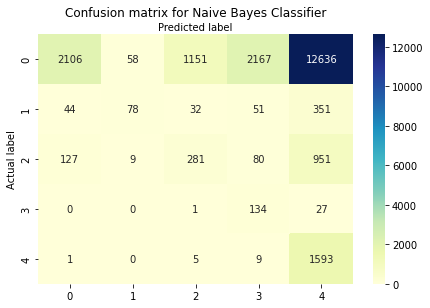

In [51]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Naive Bayes model has an accoracy score which is very less. Hence this model is not suitable to be applied for this dataset.

**Random Forest Classifier**

In [54]:
rf_model=RandomForestClassifier()

In [55]:
cv1 = StratifiedKFold(n_splits=5) 
cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv=cv1)
print(cv_score_rf)
print(cv_score_rf.mean())

[0.97384501 0.97715722 0.97475872 0.97424476 0.97435751]
0.9748726441380846


In [56]:
# Fitting the train data into the model
rf.fit(X_train, y_train)
y_pred_rfc= rf.predict(X_test)
# compute the accuracy
print("Accuracy Score for Random Forest Classifier Model:",accuracy_score(y_test, y_pred_rfc))

Accuracy Score for Random Forest Classifier Model: 0.97464827334186


In [57]:
cnf_matrix_rfc=confusion_matrix(y_test, y_pred_rfc,labels=('N','S','V','F','Q'))
cnf_matrix_rfc

array([[18102,     6,     9,     0,     1],
       [  215,   337,     3,     0,     1],
       [  150,     0,  1280,    12,     6],
       [   52,     0,    11,    99,     0],
       [   84,     0,     5,     0,  1519]])

Text(0.5, 257.44, 'Predicted label')

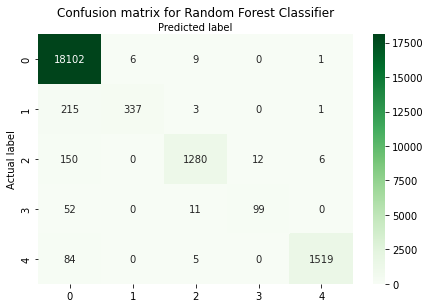

In [58]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True,cmap=plt.cm.Greens,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print(classification_report(y_test, y_pred_rfc)) 

              precision    recall  f1-score   support

           F       0.89      0.61      0.73       162
           N       0.97      1.00      0.99     18118
           Q       0.99      0.94      0.97      1608
           S       0.98      0.61      0.75       556
           V       0.98      0.88      0.93      1448

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892



The Accoracy Score using the Random Forest Classifier 97% which is very high but while looking at the Confusion Matrix, we can still see that some of the other classes of heartbeat is classified as Normal. **But the results looks better than the Linear Regression model.**

Trying out other models to evaluate the performance

**Support Vector Machine**

In [60]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
# compute the accuracy
print(" Accuracy Score for Support Vector Machine Model:", accuracy_score(y_test, y_pred_svc))

 Accuracy Score for Support Vector Machine Model: 0.9679791704732322


In [61]:
cnf_matrix_svc=confusion_matrix(y_test, y_pred_svc,labels=('N','S','V','F','Q'))
cnf_matrix_svc

array([[18085,    10,    17,     2,     4],
       [  237,   314,     5,     0,     0],
       [  170,     2,  1249,    25,     2],
       [   71,     0,    13,    78,     0],
       [  135,     0,     8,     0,  1465]])

Text(0.5, 257.44, 'Predicted label')

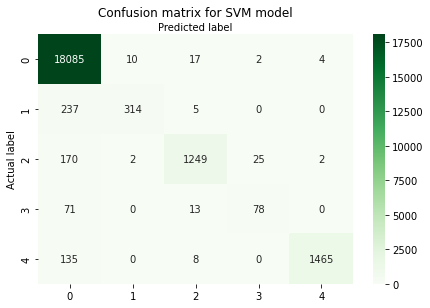

In [65]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True,cmap=plt.cm.Greens,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           F       0.74      0.48      0.58       162
           N       0.97      1.00      0.98     18118
           Q       1.00      0.91      0.95      1608
           S       0.96      0.56      0.71       556
           V       0.97      0.86      0.91      1448

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



The Accoracy Score for the Support Vector Machine model is also 97% and the confusion matrix gives similar results as of the Random Forest Model. The processing time was higher for this model.

**K-Nearest Neighbours**

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_knn))

Accuracy SCore for KNN Model: 0.9728211218710031


In [73]:
cnf_matrix_knn=print(confusion_matrix(y_test, y_pred_knn,labels=('N','S','V','F','Q')))

[[18012    40    53     9     4]
 [  188   355    12     1     0]
 [  130     3  1285    26     4]
 [   39     0    17   106     0]
 [   60     0     9     0  1539]]


In [69]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           F       0.75      0.65      0.70       162
           N       0.98      0.99      0.99     18118
           Q       0.99      0.96      0.98      1608
           S       0.89      0.64      0.74       556
           V       0.93      0.89      0.91      1448

    accuracy                           0.97     21892
   macro avg       0.91      0.83      0.86     21892
weighted avg       0.97      0.97      0.97     21892



The Accuracy score for this model is 97%

**Gradient Boost**

In [74]:
# check performance for ensemble models
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb= model_gb.predict(X_test)


In [75]:
# compute the accuracy
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_gb))

Accuracy SCore for KNN Model: 0.9641421523844327


In [78]:
cnf_matrix_gb= print(confusion_matrix(y_test, y_pred_gb,labels=('N','S','V','F','Q')))

[[18032    22    35    14    15]
 [  227   322     4     1     2]
 [  229     2  1187    23     7]
 [   66     0    14    82     0]
 [  121     0     3     0  1484]]


Although this model has Accoracy of 96%, it still has lot of misclassified data.

**Conclusion:**

Based on the models that have been tested for the given set of data without applying any sampling methods, we can see that the Random Forest Classifier, Support Vector Machine, K- Nearest Neighbour and the Gradient Boost all have a very close accoracy score of 96 %  and 97% and the Confusion Matrix is almost simlar for all of them. Performing some hyper parameter tuning might improve the prediction. But this has not been performed as part of this project.

The below code has been executed in order to find the most important features, but the code seems to be taking way too long to get executed. I am assuimg this could be due to the large number of features and the records. Hence the output of that code has not been recorded.

In [ ]:
# what are the important features??
#import matplotlib.pyplot as plt
#from sklearn.svm import SVC
#from sklearn.model_selection import StratifiedKFold
#from sklearn.feature_selection import RFECV
#from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
#model_rf = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

#min_features_to_select = 1  # Minimum number of features to consider
#rfecv = RFECV(
#   estimator=model_rf,
#   step=1,
#  cv=StratifiedKFold(2),
#    scoring="accuracy",
#    min_features_to_select=min_features_to_select,
#)
#rfecv.fit(X, y)

#print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (accuracy)")
#plt.plot(
#    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#    rfecv.grid_scores_,
#)
#plt.show()